In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

## Estimación de los coeficientes parciales dependiendo del orden p elejido mediante la PACF

In [37]:
serie = [4,5,6,8,9,10,13]
barrido  = 4
coeficientes = []
intervalos = []

In [38]:
for i in range(1, barrido+1):
    Y = serie[i:]  # representa las Y
    y = serie[:-i] # representa las X

    Y_mean = np.mean(Y)
    y_mean = np.mean(y)

    Xi_Xmean = y - y_mean
    Yi_Ymean = Y - Y_mean

    numerador = np.sum(Xi_Xmean * Yi_Ymean)
    denominador = np.sum(Xi_Xmean**2)

    phi = numerador / denominador
    coeficientes.append(phi)

    intervalo = 1.96 / np.sqrt(len(Y))
    intervalos.append(intervalo)

In [39]:
df = pd.DataFrame({"coeficientes" : coeficientes,
                    "intervalos" : intervalos})
df["ruido"] = df["coeficientes"] > df["intervalos"]
df.head()

,coeficientes,intervalos,ruido
0,1.178571,0.800167,True
1,1.197674,0.876539,True
2,1.257143,0.980000,True
3,2.000000,1.131607,True


## Ahora visualizar la función de PACF con un barrido visual usando una librería

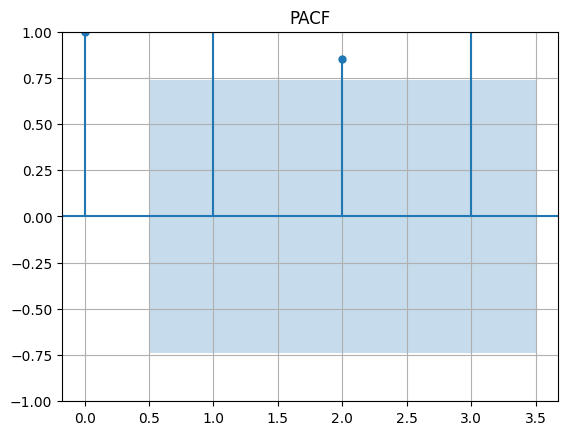

In [47]:
plot_pacf(serie, lags = 3, method = "ols", alpha = 0.05)
plt.title("PACF")
plt.grid(True)
plt.show()